<a href="https://colab.research.google.com/github/lourencocavalcante/Introduction-to-Data-Science/blob/main/CAP394_2022_ProjetoFinal_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/logoinpe.png?raw=true" width = 500 align="left">](https://www.gov.br/inpe/pt-br)

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/LogoCAP.png?raw=true" width = 300 align="right">](http://www.inpe.br/posgraduacao/cap/)

# <span style="color:#336699">Uma análise exploratória de dados meteorologicos: investigando valores não realísticos e a correlação de atributos do disdrômetro RD80 e do radiômetro de microondas MP3000A</span>
<hr style="border:2px solid #0077b9;">

<br/>

<div style="text-align: center;font-size: 110%;">
    <b>CAP-394 – Introdução à Ciência de Dados</b>
    <br/>
    <b>Docentes:</b> Dr. Rafael Duarte Coelho dos Santos e Dr. Gilberto Ribeiro de Queiroz
    <br/><br/>
    <b>Discente:</b> Lourenço José Cavalcante Neto
    <br/>
    <b>E-mail:</b> <a href="mailto:lourenco.cavalcante@ifto.edu.b">lourenco.cavalcante@ifto.edu.br</a>

</div>

<br/>

<div style="text-align: justify;  margin-left: 20%; margin-right: 20%;">
<b>Motivação: </b> O presente projeto compõe o trabalho final da disciplina <i>CAP-394 - Introdução à Data Scienc</i>, do curso de Mestrado em Computação Aplicada do Instituto Nacional de Pesquisas Espaciais (INPE), ministrada pelos professores Dr. Rafael Duarte Coelho dos Santos e Dr. Gilberto Ribeiro de Queiroz. O principal objetivo é analizar dados meteorológicos oriundos de dois equipamentos ( Radiômetro de Microondas MP3000A e o Disdrômetro RD80) instalados nas proximidades da torre ATTO, em sítio chamado Campina, na região amazônica, para tentar responder as seguintes perguntas:
<br/><br/>
1. Através da análise de atributos, é possível identificar valores não realísticos? É possível serem identificadas correlações entre os dados do MP3000A e do RD80?
<br/>
2. Quais os períodos do dia em que as chuvas apresentaram maior intensidade (mm/h)?
<br/>
3. Através da análise é possível classificar a intensidade das chuvas?
<br/>
4. É possível serem identificadas correlações entre os atributos de Temperatura do Ambiente (°C), Temperatura no canal Infravermelho (°C), Umidade Relativa e a Intensidade da chuva (mm/h) ?
<br/>
5. É possível aplicar alguma técnica de Inteligência Artificial que faça a previsão de chuva e sua intensidade para curto prazo?
</div>


# **Introdução**

A ciência de dados é a prática de mineração de grandes conjuntos de dados brutos, estruturados e não estruturados, para identificar padrões e extrair deles insights acionáveis. Este é um campo interdisciplinar, e os fundamentos da ciência de dados incluem estatísticas, inferência, ciência da computação, análise preditiva, desenvolvimento de algoritmos de aprendizado de máquina e novas tecnologias para obter insights de big data.

Este notebook contém uma Análise Exploratória de Dados meteorológicos, tal qual procuraremos identificar valores não realísticos, correlações entre os atributos, os períodos do dia em que as chuvas apresentaram maior intensidade (mm/h). Além disso, tentaremos classificar a intensidade das chuvas, tomando como referência os dados da variável **Rain Intensity(mm/h)**. Por fim, com base nos resultados obtidos com a análise, faremos uma avaliação se é possível não aplicar alguma técnica de Inteligência Artificial que faça a predição de chuva e sua intensidade fazendo o uso desses dados. 

Este notebook também pode ser visualizado no meu diretório de materiais e atividades da disciplina **CAP-394** no **Github**,  [Clicando aqui](https://github.com/lourencocavalcante/Introduction-to-Data-Science.git).

## **Análise Exploratória de Dados (EDA)**

A análise exploratória dos dados (AED) foi um termo que ganhou bastante popularidade quando Tukey publicou o livro Exploratory Data Analysis em 1977 que tratava uma “busca por conhecimento antes da análise de dados de fato”. Ocorre quando busca-se obter informações ocultas sobre os dados, tais como: variação, anomalias, distribuição, tendências, padrões e relações.

## **Dataset**

Os dados meteorológicos são oriundos de dois equipamentos (**Radiômetro de Microondas "MP3000A"** e o **Disdrômetro "RD80"**), ambos instalados próximo à torre ATTO, em um sítio chamado Campina, na região Amazônica. O MP3000A mede diversas variáveis ambiente, entre elas a radiância no espectro de onda do microonda em diversos canais e estimativas de parâmetros de nuvens. Já o RD80 mede a distribuição das gotas de chuva que chegam à superfície.

Os dados compreendem o período de 17 de março de 2020 a 07 julho 2022.

## **Importação de módulos e bibliotecas**
São várias as bibliotecas que podem ser utilizadas para realizar o pré-processamento de dados. Entre elas podemos destacar a biblioteca **Pandas**. Trata-se de uma biblioteca para leitura, manipulação e análise de dados tabulados. Essa biblioteca oferece estruturas de dados e operações para manipular conjuntos massivos de tabelas numéricas e séries temporais de forma otimizada. No python, por convensão, as bibliotecas são importadas conforme podemos ver na célula abaixo:

In [169]:
import pandas as pd
from pandas import read_csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
import calendar
import datetime

## **Obtendo os arquivos de dados**

In [170]:
#Vamos baixar os dados do Google Drive para o Notebook

 #Down. WD_campina_report_RZLwcDmDtNdrop_b2.1_report (df_RD80_JOSS_final)
!gdown --id 1pA0E4cUH0GdSD7EH_rARU5DqWOcGrcyW

 #Down. level1_output_sfc, level1_output_bt, level2_output_cld_atto (df_MP3000A_final)
!gdown --id 15YqFCbGZBuQDMO2dNh8hjMhhOJwRicUf

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1pA0E4cUH0GdSD7EH_rARU5DqWOcGrcyW
To: /content/df_RD80_JOSS_final.csv
100% 34.9M/34.9M [00:00<00:00, 262MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=15YqFCbGZBuQDMO2dNh8hjMhhOJwRicUf
To: /content/df_MP3000A_final.csv
100% 410M/410M [00:01<00:00, 333MB/s]


Temos 02 (dois) arquivos:

* **df_MP3000A_final.csv**: 
`Neste arquivo estão os dados do ambiente próximo à superfície, dados das medidas dos canais do microonda e as variáveis estimadas associadas a parâmetros de nuvens.`

* **df_RD80_JOSS_final.csv**: 
`Neste arquivo estão dados de medida da distribuição das gotas de chuva que chegam à superfície.`

Com o objetivo de facilitar a leitura dos dados e torná-los **tidy**, primeiramente será necessário carregá-los como um **dataframe**. Vamos carregar os dados e criar os dataframes:

In [171]:
#Carregando os dados e criando os Dataframes
df_RD80_JOSS=pd.read_csv('/content/df_RD80_JOSS_final.csv', index_col=[0])

#Carregando os dados e criando os Dataframes
df_MP3000A=pd.read_csv('/content/df_MP3000A_final.csv', index_col=[0])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [172]:
#Vamos verificar o tamanho dos Datasets e visualizar as suas colunas.
print('TAMANHO DO DATASET E QUANTIDADE DE ATRIBUTOS:\n')
print('Tamanho do dataset: ',df_RD80_JOSS.shape[0], ' - Quantidade de atributos: ', df_RD80_JOSS.shape[1])
print('Tamanho do dataset: ',df_MP3000A.shape[0], ' - Quantidade de atributos: ', df_MP3000A.shape[1])

TAMANHO DO DATASET E QUANTIDADE DE ATRIBUTOS:

Tamanho do dataset:  315420  - Quantidade de atributos:  18
Tamanho do dataset:  1919064  - Quantidade de atributos:  36


Dado tamanho significativo dos nossos Datasets, para evitar problemas com custo computacional, iremos utilizar **somente os dados do ano de 2022**. Vamos aplicar um filtro com a função **query()** para pegar somente os dados que quremos:

Obs.: O atributo **DataQuality** do Dataframe **df_MP3000A** que será usado como condição na queryindica dado bom. 
* DataQuality = 1 = Dado bom

In [173]:
df_RD80_JOSS = df_RD80_JOSS.query("(Datetime >= '2022-05-1' and Datetime <= '2022-07-31')")
df_MP3000A = df_MP3000A.query("((Datetime >= '2022-05-1' and Datetime <= '2022-07-31') and DataQuality == 1)")

**Novo tamanho dos Datasets**

In [174]:
#Vamos verificar o novo tamanho dos Datasets e visualizar as suas colunas.
print('TAMANHO DO DATASET E QUANTIDADE DE ATRIBUTOS:\n')
print('Tamanho do dataset: ',df_RD80_JOSS.shape[0], ' - Quantidade de atributos: ', df_RD80_JOSS.shape[1])
print('Tamanho do dataset: ',df_MP3000A.shape[0], ' - Quantidade de atributos: ', df_MP3000A.shape[1])

TAMANHO DO DATASET E QUANTIDADE DE ATRIBUTOS:

Tamanho do dataset:  64721  - Quantidade de atributos:  18
Tamanho do dataset:  147877  - Quantidade de atributos:  36


In [175]:
#Visualizar as colunas
df_RD80_JOSS.columns

Index(['Datetime', 'Date', 'Year', 'Month', 'Day_of_week', 'Time',
       'Rain_Intensity_mm_h', 'radar_reflectivity_1_mm6m3',
       'Liquid_watercontent_g_m3', 'Mean_weight_diameter_mm',
       'Time_integration_s', 'Light_Rain', 'Moderate_Rain', 'Heavy_Rain',
       'Very_Heavy_Rain', 'Without_Rain', 'Class_Rain_id', 'Class_Rain'],
      dtype='object')

In [176]:
#Visualizar as colunas
df_MP3000A.columns

Index(['Datetime', 'Date', 'Year', 'Month', 'Day_of_week', 'Time',
       'DataQuality', 'Tamb_K', 'Rh_percent', 'Pres_mb', 'Tir_K', 'Ch_22_234',
       'Ch_22_500', 'Ch_23_034', 'Ch_23_834', 'Ch_25_000', 'Ch_26_234',
       'Ch_28_000', 'Ch_30_000', 'Ch_51_248', 'Ch_51_760', 'Ch_52_280',
       'Ch_52_804', 'Ch_53_336', 'Ch_53_848', 'Ch_54_400', 'Ch_54_940',
       'Ch_55_500', 'Ch_56_020', 'Ch_56_660', 'Ch_57_288', 'Ch_57_964',
       'Ch_58_800', 'Int_Vapor_cm', 'Int_Liquid_mm', 'Cloud_Base_km'],
      dtype='object')

In [177]:
#Vamos visualizar as primeiras 2 e últimas 2 linhas dos dados
df_RD80_JOSS.loc[df_RD80_JOSS['Rain_Intensity_mm_h'] > 0].head(n=2).append(df_RD80_JOSS.loc[df_RD80_JOSS['Rain_Intensity_mm_h'] > 0].tail(n=2))

,Datetime,Date,Year,Month,Day_of_week,Time,Rain_Intensity_mm_h,radar_reflectivity_1_mm6m3,Liquid_watercontent_g_m3,Mean_weight_diameter_mm,Time_integration_s,Light_Rain,Moderate_Rain,Heavy_Rain,Very_Heavy_Rain,Without_Rain,Class_Rain_id,Class_Rain
250813,2022-05-10 01:54:00,2022-05-10,2022,May,Tuesday,01:54:00,0.12869,45.26331,0.00709,1.39702,60.0,1,0,0,0,0,1,Chuva fraca
250834,2022-05-10 02:15:00,2022-05-10,2022,May,Tuesday,02:15:00,0.10736,37.12886,0.00577,1.43824,60.0,1,0,0,0,0,1,Chuva fraca
314711,2022-06-28 21:21:00,2022-06-28,2022,Jun,Tuesday,21:21:00,0.23103,36.19424,0.01553,1.04613,60.0,1,0,0,0,0,1,Chuva fraca
314712,2022-06-28 21:22:00,2022-06-28,2022,Jun,Tuesday,21:22:00,0.14332,16.72017,0.01099,0.89704,60.0,1,0,0,0,0,1,Chuva fraca


In [178]:
#Vamos visualizar as primeiras 2 e últimas 2 linhas dos dados
df_MP3000A.loc[df_MP3000A['DataQuality'] == 1].head(n=2).append(df_MP3000A.loc[df_MP3000A['DataQuality'] == 1].tail(n=2))

,Datetime,Date,Year,Month,Day_of_week,Time,DataQuality,Tamb_K,Rh_percent,Pres_mb,...,Ch_54_940,Ch_55_500,Ch_56_020,Ch_56_660,Ch_57_288,Ch_57_964,Ch_58_800,Int_Vapor_cm,Int_Liquid_mm,Cloud_Base_km
590379,2022-05-10 00:04:19,2022-05-10,2022,May,Tuesday,00:04:19,1.0,298.47,97.04,1007.21,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0
1230085,2022-05-10 00:04:48,2022-05-10,2022,May,Tuesday,00:04:48,1.0,0.00,0.00,0.00,...,289.685,293.135,294.981,295.672,295.473,296.788,295.883,0.000,0.0,0.0
1919063,2022-06-01 09:19:59,2022-06-01,2022,Jun,Wednesday,09:19:59,1.0,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.176,0.0,0.0
639827,2022-06-01 09:20:02,2022-06-01,2022,Jun,Wednesday,09:20:02,1.0,296.90,97.12,1006.71,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0


Vamos dividir a coluna hora do dia em diferentes sessões de 6h cada, para que possamos visualizar a série temporal da intensidade das chuvas (mm/h) por **Night**, **Morning**, **Afternoon**, **Evening**. 

In [179]:
#Vamos converter o "Datetime" em um objeto datetime para que seja mais fácil realizar outras manipulações
df_RD80_JOSS['Datetime'] = df_RD80_JOSS.Datetime.astype('datetime64')

#Dividindo a coluna hora do dia em diferentes sessões em um dia
df_RD80_JOSS=df_RD80_JOSS.assign(session=pd.cut(df_RD80_JOSS.Datetime.dt.hour,
                              [0,6,12,18,23],
                              labels=['Night','Morning','Afternoon','Evening'],
                              include_lowest=True))

In [180]:
#Vamos converter o "Datetime" em um objeto datetime para que seja mais fácil realizar outras manipulações
df_MP3000A['Datetime'] = df_MP3000A.Datetime.astype('datetime64')

#Dividindo a coluna hora do dia em diferentes sessões em um dia
df_MP3000A=df_MP3000A.assign(session=pd.cut(df_MP3000A.Datetime.dt.hour,
                              [0,6,12,18,23],
                              labels=['Night','Morning','Afternoon','Evening'],
                              include_lowest=True))

## **Juntando os dados em um único Dataframe**

In [181]:
#Agora vamos juntar os dados do mp3000A em um único Dataframe, utilizando a dunção **merge** do **pandas**.
df_MP3000A_RD80_final = pd.merge(df_RD80_JOSS, df_MP3000A, how='outer', on = ['Datetime', 'Date','Year', 'Month', 'Day_of_week', 'Time', 'session'])

In [182]:
df_MP3000A_RD80_final['Datetime'] = df_MP3000A_RD80_final['Datetime'].astype(str)

In [183]:
df_MP3000A_RD80_final.session = df_MP3000A_RD80_final.session.astype(str)

In [184]:
for index, row in df_MP3000A_RD80_final.iterrows():

    if (row['Rain_Intensity_mm_h'] >= 0.1) and (row['Rain_Intensity_mm_h'] <= 2.5):
      df_MP3000A_RD80_final.loc[index,'Light_Rain'] = 1
      df_MP3000A_RD80_final.loc[index,'Class_Rain'] = 'Chuva fraca'
      df_MP3000A_RD80_final.loc[index,'Class_Rain_id'] = 1
    elif(row['Rain_Intensity_mm_h']  > 2.5) and (row['Rain_Intensity_mm_h']  <= 10):
      df_MP3000A_RD80_final.loc[index,'Moderate_Rain'] = 1
      df_MP3000A_RD80_final.loc[index,'Class_Rain'] = 'Chuva moderada'
      df_MP3000A_RD80_final.loc[index,'Class_Rain_id'] = 2
    elif (row['Rain_Intensity_mm_h']  > 10) and (row['Rain_Intensity_mm_h']  <= 50):
      df_MP3000A_RD80_final.loc[index,'Heavy_Rain'] = 1
      df_MP3000A_RD80_final.loc[index,'Class_Rain'] = 'Chuva forte'
      df_MP3000A_RD80_final.loc[index,'Class_Rain_id'] = 3
    elif (row['Rain_Intensity_mm_h']  > 50):
      df_MP3000A_RD80_final.loc[index,'Very_Heavy_Rain'] = 1
      df_MP3000A_RD80_final.loc[index,'Class_Rain'] = 'Chuva muito forte'
      df_MP3000A_RD80_final.loc[index,'Class_Rain_id'] = 4
    else:
      df_MP3000A_RD80_final.loc[index,'Without_Rain'] = 1
      df_MP3000A_RD80_final.loc[index,'Class_Rain'] = 'Não choveu'
      df_MP3000A_RD80_final.loc[index,'Class_Rain_id'] = 0

In [185]:
df_MP3000A_RD80_final.isna().sum()

Datetime                           0
Date                               0
Year                               0
Month                              0
Day_of_week                        0
Time                               0
Rain_Intensity_mm_h           145427
radar_reflectivity_1_mm6m3    145427
Liquid_watercontent_g_m3      145427
Mean_weight_diameter_mm       145427
Time_integration_s            145427
Light_Rain                    145427
Moderate_Rain                 145427
Heavy_Rain                    145427
Very_Heavy_Rain               145427
Without_Rain                       0
Class_Rain_id                      0
Class_Rain                         0
session                            0
DataQuality                    62271
Tamb_K                         62271
Rh_percent                     62271
Pres_mb                        62271
Tir_K                          62271
Ch_22_234                      62271
Ch_22_500                      62271
Ch_23_034                      62271
C

In [186]:
list_nan = ['Rain_Intensity_mm_h', 'radar_reflectivity_1_mm6m3',
       'Liquid_watercontent_g_m3', 'Mean_weight_diameter_mm',
       'Time_integration_s']

for res in range(0,5):
  df_MP3000A_RD80_final[list_nan[res]].fillna(value = 0,  inplace = True)

In [187]:
#Substituindo valores Nulos por 0 (zero)
df_MP3000A_RD80_final.fillna(value = -999.99,  inplace = True)


In [188]:
df_MP3000A_RD80_final.isna().sum()

Datetime                      0
Date                          0
Year                          0
Month                         0
Day_of_week                   0
Time                          0
Rain_Intensity_mm_h           0
radar_reflectivity_1_mm6m3    0
Liquid_watercontent_g_m3      0
Mean_weight_diameter_mm       0
Time_integration_s            0
Light_Rain                    0
Moderate_Rain                 0
Heavy_Rain                    0
Very_Heavy_Rain               0
Without_Rain                  0
Class_Rain_id                 0
Class_Rain                    0
session                       0
DataQuality                   0
Tamb_K                        0
Rh_percent                    0
Pres_mb                       0
Tir_K                         0
Ch_22_234                     0
Ch_22_500                     0
Ch_23_034                     0
Ch_23_834                     0
Ch_25_000                     0
Ch_26_234                     0
Ch_28_000                     0
Ch_30_00

In [189]:
df_MP3000A_RD80_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210148 entries, 0 to 210147
Data columns (total 49 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Datetime                    210148 non-null  object 
 1   Date                        210148 non-null  object 
 2   Year                        210148 non-null  int64  
 3   Month                       210148 non-null  object 
 4   Day_of_week                 210148 non-null  object 
 5   Time                        210148 non-null  object 
 6   Rain_Intensity_mm_h         210148 non-null  float64
 7   radar_reflectivity_1_mm6m3  210148 non-null  float64
 8   Liquid_watercontent_g_m3    210148 non-null  float64
 9   Mean_weight_diameter_mm     210148 non-null  float64
 10  Time_integration_s          210148 non-null  float64
 11  Light_Rain                  210148 non-null  float64
 12  Moderate_Rain               210148 non-null  float64
 13  Heavy_Rain    

In [190]:
df_MP3000A_RD80_final = df_MP3000A_RD80_final.sort_values(by=['Datetime'])

In [191]:
df_MP3000A_RD80_final.columns

Index(['Datetime', 'Date', 'Year', 'Month', 'Day_of_week', 'Time',
       'Rain_Intensity_mm_h', 'radar_reflectivity_1_mm6m3',
       'Liquid_watercontent_g_m3', 'Mean_weight_diameter_mm',
       'Time_integration_s', 'Light_Rain', 'Moderate_Rain', 'Heavy_Rain',
       'Very_Heavy_Rain', 'Without_Rain', 'Class_Rain_id', 'Class_Rain',
       'session', 'DataQuality', 'Tamb_K', 'Rh_percent', 'Pres_mb', 'Tir_K',
       'Ch_22_234', 'Ch_22_500', 'Ch_23_034', 'Ch_23_834', 'Ch_25_000',
       'Ch_26_234', 'Ch_28_000', 'Ch_30_000', 'Ch_51_248', 'Ch_51_760',
       'Ch_52_280', 'Ch_52_804', 'Ch_53_336', 'Ch_53_848', 'Ch_54_400',
       'Ch_54_940', 'Ch_55_500', 'Ch_56_020', 'Ch_56_660', 'Ch_57_288',
       'Ch_57_964', 'Ch_58_800', 'Int_Vapor_cm', 'Int_Liquid_mm',
       'Cloud_Base_km'],
      dtype='object')

In [192]:
df_MP3000A_RD80_final = df_MP3000A_RD80_final.reindex(columns=['Datetime', 'Date', 'Year', 'Month', 'Day_of_week', 'Time','session',
       'Rain_Intensity_mm_h', 'radar_reflectivity_1_mm6m3',
       'Liquid_watercontent_g_m3', 'Mean_weight_diameter_mm',
       'Time_integration_s', 'DataQuality', 'Tamb_K', 'Rh_percent', 'Pres_mb', 'Tir_K',
       'Ch_22_234', 'Ch_22_500', 'Ch_23_034', 'Ch_23_834', 'Ch_25_000',
       'Ch_26_234', 'Ch_28_000', 'Ch_30_000', 'Ch_51_248', 'Ch_51_760',
       'Ch_52_280', 'Ch_52_804', 'Ch_53_336', 'Ch_53_848', 'Ch_54_400',
       'Ch_54_940', 'Ch_55_500', 'Ch_56_020', 'Ch_56_660', 'Ch_57_288',
       'Ch_57_964', 'Ch_58_800', 'Int_Vapor_cm', 'Int_Liquid_mm',
       'Cloud_Base_km', 'Light_Rain', 'Moderate_Rain', 'Heavy_Rain',
       'Very_Heavy_Rain', 'Without_Rain', 'Class_Rain_id', 'Class_Rain'])

In [193]:
#Salvando/Exportando os Dataframes para o formato CSV
df_MP3000A_RD80_final.to_csv('./df_MP3000A_RD80_final.csv')

**Primeira visualização dos nosos dados**

In [194]:
#Vamos visualizar as primeiras 2 e últimas 2 linhas dos dados
df_MP3000A_RD80_final.loc[df_MP3000A_RD80_final['DataQuality'] > 0].head(n=2).append(df_MP3000A_RD80_final.loc[df_MP3000A_RD80_final['DataQuality'] > 0].tail(n=2))

,Datetime,Date,Year,Month,Day_of_week,Time,session,Rain_Intensity_mm_h,radar_reflectivity_1_mm6m3,Liquid_watercontent_g_m3,...,Int_Vapor_cm,Int_Liquid_mm,Cloud_Base_km,Light_Rain,Moderate_Rain,Heavy_Rain,Very_Heavy_Rain,Without_Rain,Class_Rain_id,Class_Rain
64721,2022-05-10 00:04:19,2022-05-10,2022,May,Tuesday,00:04:19,Night,0.0,0.0,0.0,...,0.000,0.0,0.0,-999.99,-999.99,-999.99,-999.99,1.0,0.0,Não choveu
64722,2022-05-10 00:04:48,2022-05-10,2022,May,Tuesday,00:04:48,Night,0.0,0.0,0.0,...,0.000,0.0,0.0,-999.99,-999.99,-999.99,-999.99,1.0,0.0,Não choveu
210146,2022-06-01 09:19:59,2022-06-01,2022,Jun,Wednesday,09:19:59,Morning,0.0,0.0,0.0,...,4.176,0.0,0.0,-999.99,-999.99,-999.99,-999.99,1.0,0.0,Não choveu
210147,2022-06-01 09:20:02,2022-06-01,2022,Jun,Wednesday,09:20:02,Morning,0.0,0.0,0.0,...,0.000,0.0,0.0,-999.99,-999.99,-999.99,-999.99,1.0,0.0,Não choveu


In [195]:
#Vamos verificar o tamanho dos Datasets e visualizar as suas colunas.
print('TAMANHO DO DATASET E QUANTIDADE DE ATRIBUTOS:\n')
print('Tamanho do dataset: ',df_MP3000A_RD80_final.shape[0], ' - Quantidade de atributos: ', df_MP3000A_RD80_final.shape[1])

TAMANHO DO DATASET E QUANTIDADE DE ATRIBUTOS:

Tamanho do dataset:  210148  - Quantidade de atributos:  49


In [196]:
df_MP3000A_RD80_final.columns

Index(['Datetime', 'Date', 'Year', 'Month', 'Day_of_week', 'Time', 'session',
       'Rain_Intensity_mm_h', 'radar_reflectivity_1_mm6m3',
       'Liquid_watercontent_g_m3', 'Mean_weight_diameter_mm',
       'Time_integration_s', 'DataQuality', 'Tamb_K', 'Rh_percent', 'Pres_mb',
       'Tir_K', 'Ch_22_234', 'Ch_22_500', 'Ch_23_034', 'Ch_23_834',
       'Ch_25_000', 'Ch_26_234', 'Ch_28_000', 'Ch_30_000', 'Ch_51_248',
       'Ch_51_760', 'Ch_52_280', 'Ch_52_804', 'Ch_53_336', 'Ch_53_848',
       'Ch_54_400', 'Ch_54_940', 'Ch_55_500', 'Ch_56_020', 'Ch_56_660',
       'Ch_57_288', 'Ch_57_964', 'Ch_58_800', 'Int_Vapor_cm', 'Int_Liquid_mm',
       'Cloud_Base_km', 'Light_Rain', 'Moderate_Rain', 'Heavy_Rain',
       'Very_Heavy_Rain', 'Without_Rain', 'Class_Rain_id', 'Class_Rain'],
      dtype='object')

No **df_MP3000A_final**, a **unidade de medida** dos canais Ch 22.234, Ch 22.500, Ch 23.034, Ch 23.834, Ch 25.000, Ch 26.234, Ch 28.000, Ch 30.000, Ch 51.248, Ch 51.760, Ch 52.280, Ch 52.804, Ch 53.336, Ch 53.848, Ch 54.400, Ch 54.940, Ch 55.500, Ch 56.020, Ch 56.660, Ch 57.288, Ch 57.964, Ch 58.800 é em **K (Kelvin**). Assim como é para **Tamb** e **Tir**. Vamos aplicar a conversão de **K (Kelvin)** para **°C (Celsius)**.

In [197]:
df_MP3000A_RD80_final[['Tamb_K', 'Tir_K', 'Ch_22_234',
       'Ch_22_500', 'Ch_23_034', 'Ch_23_834', 'Ch_25_000', 'Ch_26_234',
       'Ch_28_000', 'Ch_30_000', 'Ch_51_248', 'Ch_51_760', 'Ch_52_280',
       'Ch_52_804', 'Ch_53_336', 'Ch_53_848', 'Ch_54_400', 'Ch_54_940',
       'Ch_55_500', 'Ch_56_020', 'Ch_56_660', 'Ch_57_288', 'Ch_57_964',
       'Ch_58_800']] = df_MP3000A_RD80_final[['Tamb_K', 'Tir_K', 'Ch_22_234',
       'Ch_22_500', 'Ch_23_034', 'Ch_23_834', 'Ch_25_000', 'Ch_26_234',
       'Ch_28_000', 'Ch_30_000', 'Ch_51_248', 'Ch_51_760', 'Ch_52_280',
       'Ch_52_804', 'Ch_53_336', 'Ch_53_848', 'Ch_54_400', 'Ch_54_940',
       'Ch_55_500', 'Ch_56_020', 'Ch_56_660', 'Ch_57_288', 'Ch_57_964',
       'Ch_58_800']].astype(float)

In [198]:

convert_k_c = ['Tamb_K', 'Tir_K', 'Ch_22_234',
       'Ch_22_500', 'Ch_23_034', 'Ch_23_834', 'Ch_25_000', 'Ch_26_234',
       'Ch_28_000', 'Ch_30_000', 'Ch_51_248', 'Ch_51_760', 'Ch_52_280',
       'Ch_52_804', 'Ch_53_336', 'Ch_53_848', 'Ch_54_400', 'Ch_54_940',
       'Ch_55_500', 'Ch_56_020', 'Ch_56_660', 'Ch_57_288', 'Ch_57_964',
       'Ch_58_800']

for k_c in range(0, len(convert_k_c)):
  df_MP3000A_RD80_final[convert_k_c[k_c]][df_MP3000A_RD80_final[convert_k_c[k_c]] != 0] = (df_MP3000A_RD80_final[convert_k_c[k_c]])-273.15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [199]:
#Vamos visualizar as primeiras 2 e últimas 2 linhas dos dados
df_MP3000A_RD80_final.loc[df_MP3000A_RD80_final['DataQuality'] > 0].head(n=2).append(df_MP3000A_RD80_final.loc[df_MP3000A_RD80_final['DataQuality'] > 0].tail(n=2))

,Datetime,Date,Year,Month,Day_of_week,Time,session,Rain_Intensity_mm_h,radar_reflectivity_1_mm6m3,Liquid_watercontent_g_m3,...,Int_Vapor_cm,Int_Liquid_mm,Cloud_Base_km,Light_Rain,Moderate_Rain,Heavy_Rain,Very_Heavy_Rain,Without_Rain,Class_Rain_id,Class_Rain
64721,2022-05-10 00:04:19,2022-05-10,2022,May,Tuesday,00:04:19,Night,0.0,0.0,0.0,...,0.000,0.0,0.0,-999.99,-999.99,-999.99,-999.99,1.0,0.0,Não choveu
64722,2022-05-10 00:04:48,2022-05-10,2022,May,Tuesday,00:04:48,Night,0.0,0.0,0.0,...,0.000,0.0,0.0,-999.99,-999.99,-999.99,-999.99,1.0,0.0,Não choveu
210146,2022-06-01 09:19:59,2022-06-01,2022,Jun,Wednesday,09:19:59,Morning,0.0,0.0,0.0,...,4.176,0.0,0.0,-999.99,-999.99,-999.99,-999.99,1.0,0.0,Não choveu
210147,2022-06-01 09:20:02,2022-06-01,2022,Jun,Wednesday,09:20:02,Morning,0.0,0.0,0.0,...,0.000,0.0,0.0,-999.99,-999.99,-999.99,-999.99,1.0,0.0,Não choveu


Vamos visualizar o acumulado da intensidade da chuva para todo o período dos dados, olhando apenas os registros de chuva, usando como referência a variável Rain_Intensity_mm_h.

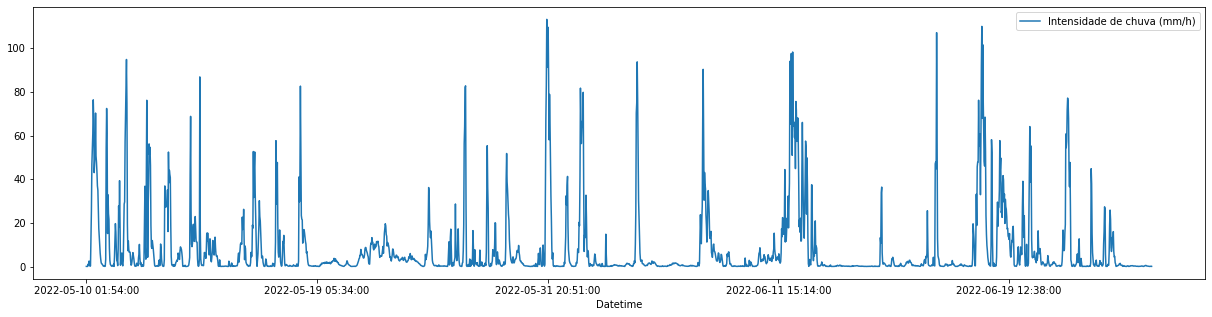

In [200]:
#Plotando o acumulado da intensidade da chuva por horário do dia
df_RD80_JOSS_temp= df_MP3000A_RD80_final.query("(Rain_Intensity_mm_h > 0)")

ax = plt.gca()
plt.rcParams["figure.figsize"] = [21,5]
df_RD80_JOSS_temp.plot(kind="line",x="Datetime",y="Rain_Intensity_mm_h",label='Intensidade de chuva (mm/h)', ax=ax)
#df_RD80_JOSS_final.plot(kind='line',x='Date',y="Int_Liquid_mm", label='Conteúdo de água líquida integrado na nuvem (mm)', ax=ax)

Agora vamos plotar a série temporal da intensidade das chuvas, separando os dados por períodos do dia: Night, Morning, Afternoon e Evening (Noite, Manhã, Tarde e Começo da noite).

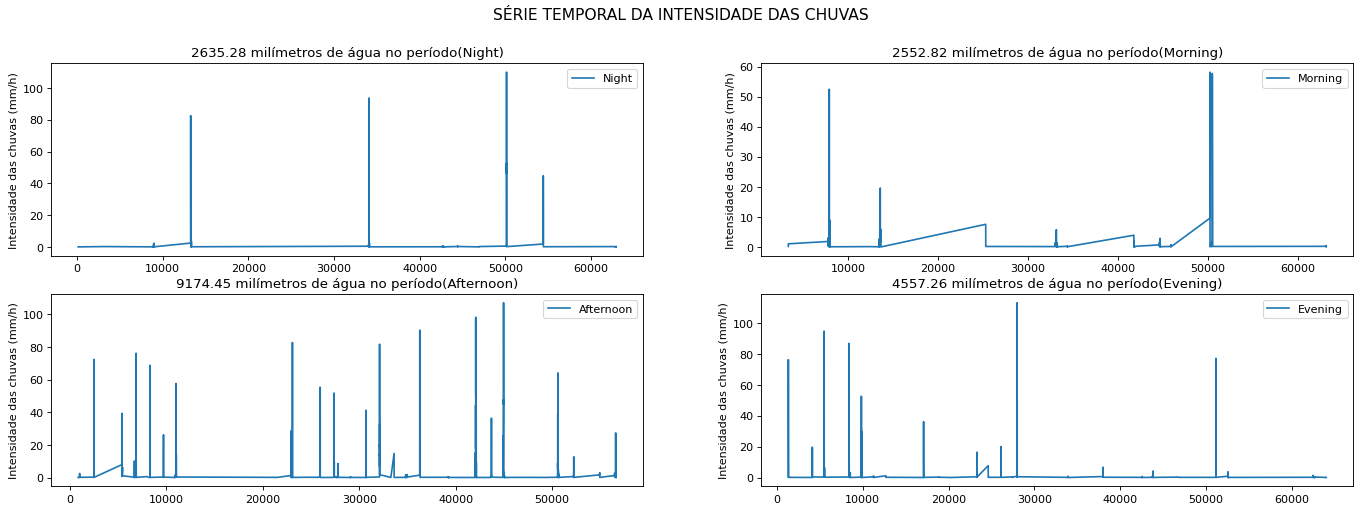

In [201]:
df_RD80_JOSS_temp= df_MP3000A_RD80_final.query("(Rain_Intensity_mm_h > 0)")

labels=['Night','Morning','Afternoon','Evening']

figure(figsize=(21,7),dpi=80)
plt.suptitle('SÉRIE TEMPORAL DA INTENSIDADE DAS CHUVAS', size=14)
for res in range(0,4):
    tot = round(df_RD80_JOSS_temp.Rain_Intensity_mm_h.loc[df_RD80_JOSS_temp.session == labels[res]].sum(),2)
    plt.subplot(2,2,res+1)
    plt.title(str(tot)+' milímetros de água no período('+labels[res]+')')
    #plt.xlabel("")
    plt.ylabel("Intensidade das chuvas (mm/h)")
    plt.plot(df_RD80_JOSS_temp.loc[df_RD80_JOSS_temp.session == labels[res]]['Rain_Intensity_mm_h'], label=labels[res])
    plt.legend()
plt.show()

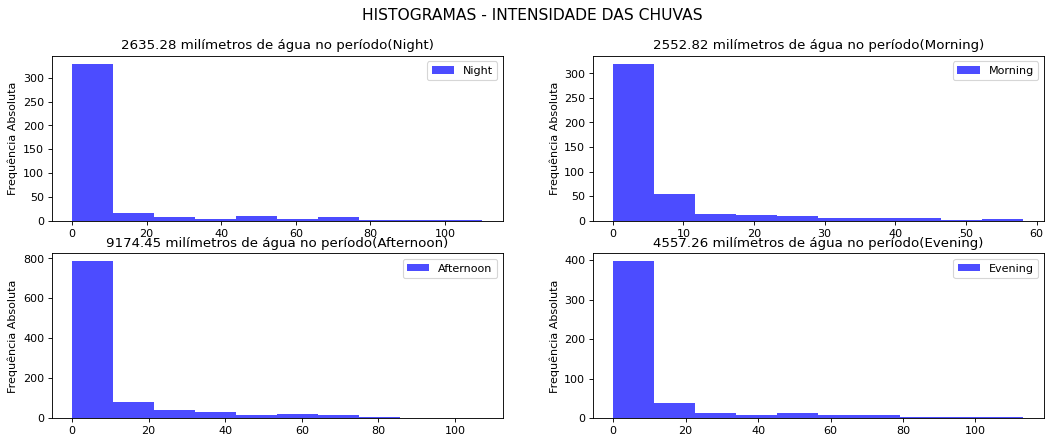

In [202]:
df_RD80_JOSS_temp= df_MP3000A_RD80_final.query("(Rain_Intensity_mm_h > 0)")
labels=['Night','Morning','Afternoon','Evening']

figure(figsize=(16,6),dpi=80)
plt.suptitle('HISTOGRAMAS - INTENSIDADE DAS CHUVAS', size=14)
for res in range(0,4):
    tot = round(df_RD80_JOSS_temp.Rain_Intensity_mm_h.loc[df_RD80_JOSS_temp.session == labels[res]].sum(),2)
    plt.subplot(2,2,res+1)
    plt.title(str(tot)+' milímetros de água no período('+labels[res]+')')
    #plt.xlabel("")
    plt.ylabel("Frequência Absoluta")
    plt.hist(df_RD80_JOSS_temp.loc[df_RD80_JOSS_temp.session == labels[res]]['Rain_Intensity_mm_h'], label=labels[res], color='b', alpha=0.7 )
    plt.legend()
plt.show()

Como podemos ver, os resultados dos gráficos acima nos levam a inferir que ocorreu uma maior intensidade de chuva no período da **tarde (Afternoon)** durante todo o período observado, chegando a uma Frequência Absoluta de mais de 800.

Agora vamos visualizar este dado de forma separada, executando o código da célula abaixo.

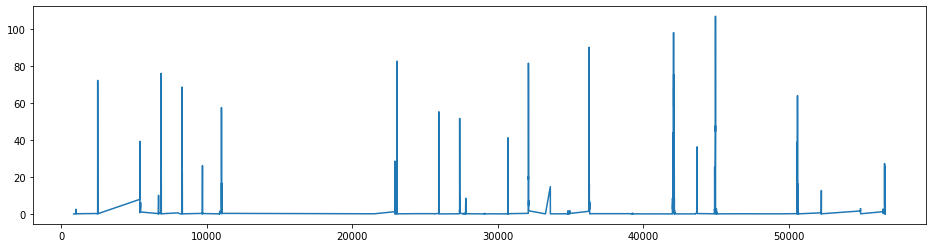

In [203]:
#Plotando o acumulado da intensidade da chuva do período da tarde (Afternoon)
df_RD80_JOSS_temp= df_MP3000A_RD80_final.query("(Rain_Intensity_mm_h > 0 and session == 'Afternoon')")
plt.figure(figsize=(16, 4))
plt.plot(df_RD80_JOSS_temp.Rain_Intensity_mm_h)

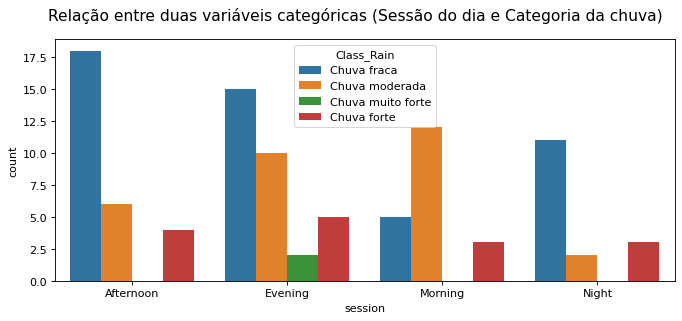

In [204]:
#Relação entre duas variáveis categóricas

df_RD80_JOSS_temp= df_MP3000A_RD80_final.query("(Rain_Intensity_mm_h > 0 and DataQuality > 0)")

figure(figsize=(10,4),dpi=80)
plt.suptitle('Relação entre duas variáveis categóricas (Sessão do dia e Categoria da chuva)', size=14)
sns.countplot(x="session", hue = "Class_Rain", data = df_RD80_JOSS_temp)

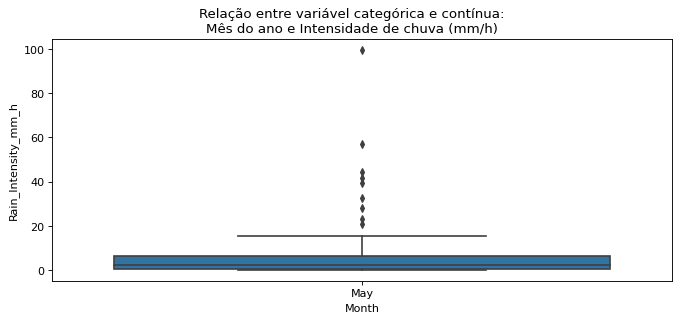

In [205]:
# Relação entre variável categórica e contínua

df_RD80_JOSS_temp= df_MP3000A_RD80_final.query("(Rain_Intensity_mm_h > 0 and DataQuality > 0)")

figure(figsize=(10,4),dpi=80)
plt.suptitle('Relação entre variável categórica e contínua:\nMês do ano e Intensidade de chuva (mm/h)', fontdict={'fontsize':16})
sns.boxplot(x="Month", y="Rain_Intensity_mm_h", data = df_RD80_JOSS_temp)

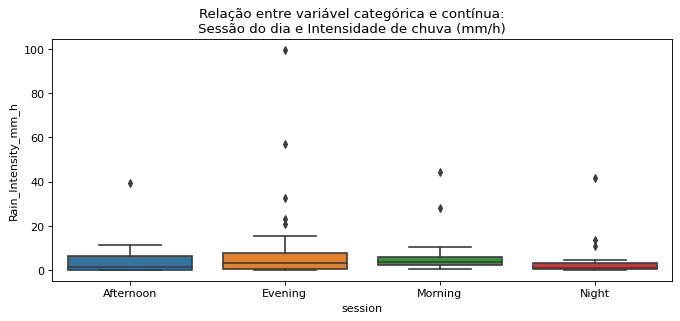

In [206]:
# Relação entre variável categórica e contínua

df_RD80_JOSS_temp= df_MP3000A_RD80_final.query("(Rain_Intensity_mm_h > 0 and DataQuality > 0)")

figure(figsize=(10,4),dpi=80)
plt.suptitle('Relação entre variável categórica e contínua:\nSessão do dia e Intensidade de chuva (mm/h)', fontdict={'fontsize':16})
sns.boxplot(x="session", y="Rain_Intensity_mm_h", data = df_RD80_JOSS_temp)

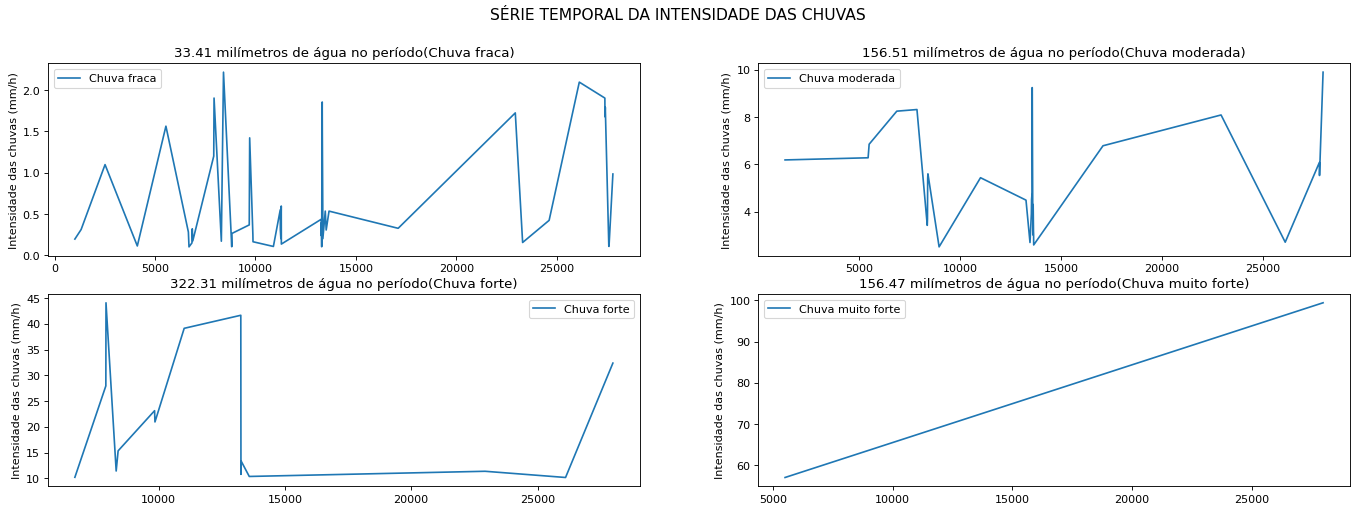

In [207]:
labels=['Chuva fraca','Chuva moderada','Chuva forte','Chuva muito forte']

figure(figsize=(21,7),dpi=80)
plt.suptitle('SÉRIE TEMPORAL DA INTENSIDADE DAS CHUVAS', size=14)
for res in range(0,4):
    tot = round(df_RD80_JOSS_temp.Rain_Intensity_mm_h.loc[df_RD80_JOSS_temp.Class_Rain == labels[res]].sum(),2)
    plt.subplot(2,2,res+1)
    plt.title(str(tot)+' milímetros de água no período('+labels[res]+')')
    #plt.xlabel("")
    plt.ylabel("Intensidade das chuvas (mm/h)")
    plt.plot(df_RD80_JOSS_temp.loc[df_RD80_JOSS_temp.Class_Rain == labels[res]]['Rain_Intensity_mm_h'], label=labels[res])
    plt.legend()
plt.show()

In [208]:
df_MP3000A_RD80_final.columns

Index(['Datetime', 'Date', 'Year', 'Month', 'Day_of_week', 'Time', 'session',
       'Rain_Intensity_mm_h', 'radar_reflectivity_1_mm6m3',
       'Liquid_watercontent_g_m3', 'Mean_weight_diameter_mm',
       'Time_integration_s', 'DataQuality', 'Tamb_K', 'Rh_percent', 'Pres_mb',
       'Tir_K', 'Ch_22_234', 'Ch_22_500', 'Ch_23_034', 'Ch_23_834',
       'Ch_25_000', 'Ch_26_234', 'Ch_28_000', 'Ch_30_000', 'Ch_51_248',
       'Ch_51_760', 'Ch_52_280', 'Ch_52_804', 'Ch_53_336', 'Ch_53_848',
       'Ch_54_400', 'Ch_54_940', 'Ch_55_500', 'Ch_56_020', 'Ch_56_660',
       'Ch_57_288', 'Ch_57_964', 'Ch_58_800', 'Int_Vapor_cm', 'Int_Liquid_mm',
       'Cloud_Base_km', 'Light_Rain', 'Moderate_Rain', 'Heavy_Rain',
       'Very_Heavy_Rain', 'Without_Rain', 'Class_Rain_id', 'Class_Rain'],
      dtype='object')

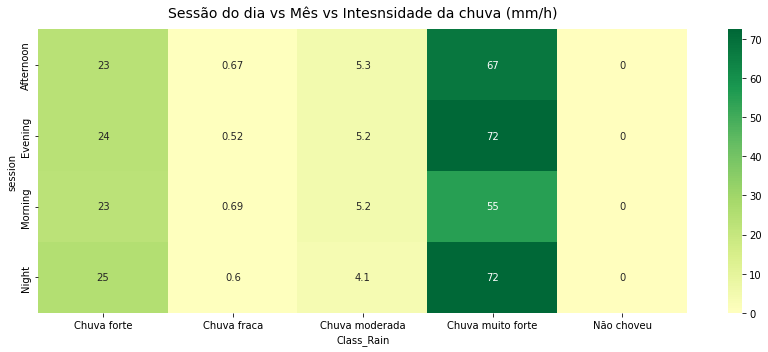

In [209]:
# Criando heatmap de Sessão do dia vs Mês vs Intesnsidade da chuva (mm/h)
result = pd.pivot_table(data=df_MP3000A_RD80_final, index='session', columns='Class_Rain', values='Rain_Intensity_mm_h')
plt.figure(figsize=(12, 5))
heatmap = sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117)
heatmap.set_title('Sessão do dia vs Mês vs Intesnsidade da chuva (mm/h)', fontdict={'fontsize':14}, pad=12);
plt.tight_layout()
plt.savefig('heatmap2.png')
plt.show()

Vamos visualizar o acumulado da intensidade da chuva para todo o período dos dados, olhando apenas os registros de chuva, usando como referência a variável Rain_Intensity_mm_h.

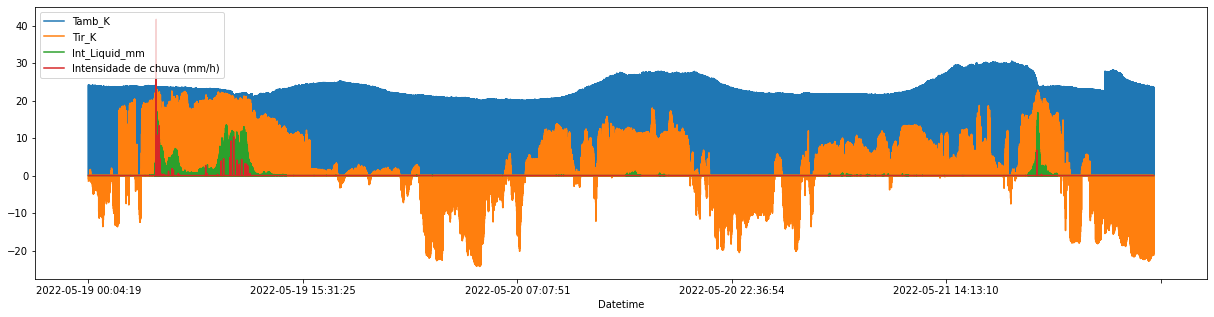

In [210]:
#Plotando o acumulado da intensidade da chuva por horário do dia
df_filter_MP3000A_RD80_final = df_MP3000A_RD80_final.query("(Datetime >= '2022-05-19' and Datetime <= '2022-05-24' and DataQuality == 1)")

ax = plt.gca()
plt.rcParams["figure.figsize"] = [21,5]

df_filter_MP3000A_RD80_final.plot(kind='line',x='Datetime',y="Tamb_K", label='Tamb_K', ax=ax)
df_filter_MP3000A_RD80_final.plot(kind='line',x='Datetime',y="Tir_K", label='Tir_K', ax=ax)
df_filter_MP3000A_RD80_final.plot(kind='line',x='Datetime',y="Int_Liquid_mm", label='Int_Liquid_mm', ax=ax)
df_filter_MP3000A_RD80_final.plot(kind="line",x="Datetime",y="Rain_Intensity_mm_h",label='Intensidade de chuva (mm/h)', ax=ax)

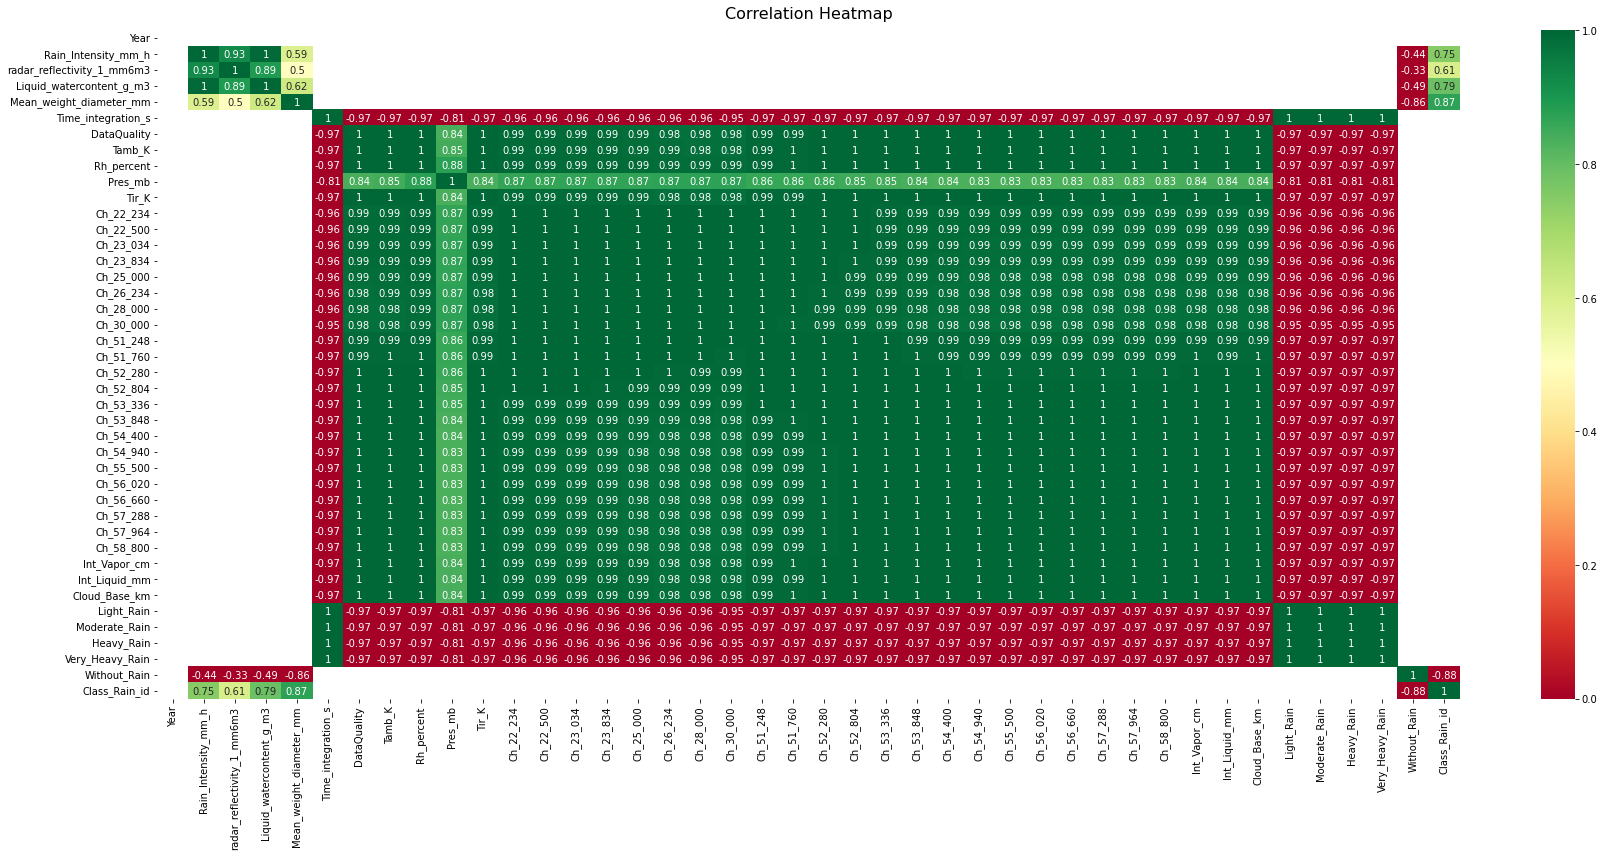

In [211]:
corr = df_MP3000A_RD80_final.corr()

plt.figure(figsize=(25, 12))
heatmap = sns.heatmap(corr[(corr >= 0.30) | (corr <= -0.30)], vmin=0, vmax=1, annot=True, cmap = 'RdYlGn')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=12)
plt.tight_layout()
plt.savefig('heatmap1.png')
plt.show()

# **Considerações finais**

A partir da EDA, foi possível responder as perguntas levantadas no início do presente projeto. Ou seja, atravé da Anaálise Eploratória nos Dados, podemos dizer que:

* Através da análise de atributos, foi possível identificar valores não realísticos nos dados e, foram identificadas correlações entre os dados do MP3000A e do RD80, após juntá-los e gerarmos o Heatmap dos dados juntos.

* Como vimos, o período do dia em que apresentou a maior intensidade de chuva (acúmulo total no período observado) foi no horário da tarde (Afternoon)
* Através da análise foi possível classificar/categorizar a intensidade das chuvas em: Não choveu, Chuva fraca, Chuva moderada, Chuva forte e Chuva muito forte.

* Foram identificadas correlações entre os atributos de Temperatura do Ambiente (°C), Temperatura no canal Infravermelho (°C), Umidade Relativa e a Intensidade da chuva (mm/h). 

Um dado bem relevante e que chamou bastante atenção. Foi possível perceber de forma clara e evidente que na medida em que a Temperatura do Ambiente (°C)(**Tamb_K**), Temperatura no canal Infravermelho (°C)(**Tir_K**)Conteúdo de água líquida integrado na nuvem (**Int_Liquid_mm**) aumentam, foi detectada a ocorrência chuva e relação direta com a sua intensidade (mm/h). Dado que nos leva a entender e propor, para um trabalho futuro, a aplicação de alguma técnica de Inteligência Artificial que faça a predição de chuva e sua intensidade, utilizando esses atributos.

.

# **Referências**

BRUCE, A.; BRUCE, P. Estatística Prática para Cientistas de Dados. [S.l.]: Alta Books, 2019. ISBN 9788550810805.

COX, V. Exploratory Data Analysis. In: Translating Statistics to Make Decisions. [S.l.]: Apress, Berkeley, CA, 2017. ISBN 978-1-4842-2256-0.

ESCOVEDO, T.; KOSHIYAMA, A. Introdução a Data Science: Algoritmos de Machine
Learning e métodos de análise. [S.l.]: Casa do Código, 2020. ISBN 9788572540551.

IGUAL, L. et al. Introduction to Data Science: A Python Approach to Concepts, Techniques and Applications. [S.l.]: Springer International Publishing, 2017. (Undergraduate Topics in Computer Science). ISBN 9783319500171.

ROSE, T.; CREWELL, S.; LÖHNERT, U.; SIMMER, C. A network suitable microwave radiometer for operational monitoring of the cloudy atmosphere, Atmos. Res., 75, 183–200, 2005.

Tukey, John (1977). Exploratory Data Analysis. Addison-Wesley Publishing Company.

https://cienciadedadosuff.github.io/cursos/notebooks/caderno-3.html

https://gomesfellipe.github.io/post/2018-05-26-smarteademachinelearning/smarteademachinelearning/

http://chuvaproject.cptec.inpe.br/portal/goamazon/instrumentos.html